# Теория вероятностей и математическая статистика

## Урок 5

## Проверка статистических гипотез. P-значения. Доверительные интервалы

### Проверка статистических гипотез

__Статистическая гипотеза__ — предположение о виде распределения и свойствах случайной величины, которое можно подтвердить или опровергнуть на основании имеющихся данных.

Например,
1. Гипотеза: математическое ожидание случайной величины равно $10$.
2. Гипотеза: случайная величина имеет нормальное распределение.
3. Гипотеза: две случайные величины имеют одинаковое математическое ожидание.

Проверяемую гипотезу принято называть __нулевой__ и обозначать $H_0$.

__Пример 1__

Имеется станок, изготавливающий шарики для подшипников, который настроен делать шарики с диаметром $1$ мм. На основании выборки из значений диаметров таких шариков мы можем проверить, правильно ли станок откалиброван (т.е. делает ли он такие шарики, которые он настроен делать). 

В таком случае в качестве нулевой гипотезы $H_0$ берётся гипотеза о том, что математическое ожидание диаметра шарика равно $1$ мм.

Параллельно с нулевой гипотезой рассматривается противоречащая ей гипотеза $H_1$, называемая __альтернативной__ или __конкурирующей__.

В нашем примере в качестве альтернативной гипотезы будет выступать гипотеза о том, что математическое ожидание диаметра шарика не равно $1$ мм.

В зависимости от задачи альтернативные гипотезы бывают __левосторонние__, __правосторонние__ или __двухсторонние__. 
    
Например, в примере выше альтернативная гипотеза двухсторонняя, поскольку в соответствии с ней математическое ожидание может быть как больше $1$, так и меньше. 

Односторонние гипотезы, возникают, например, когда анализируемое значение равно $0$, если нулевая гипотеза верна, и больше $0$, если гипотеза неверна. Например, такие гипотезы проверяются в F-тестах (подробнее на уроках 7 и 8).

В любом случае альтернативная гипотеза представляет собой _дополнение к нулевой_ (т.е. хотя бы одна из них всегда верна).

__Пример 1 (продолжение)__

Прежде чем приступить к формальному описанию процесса проверки гипотез, давайте подумаем, как бы мы подошли к проверке такой гипотезы, если бы мы совсем ничего про это всё не знали. Вот у нас есть выборка из значений диаметра подшипника.

In [1]:
import numpy as np

In [2]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
                    1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
                    0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ])

Гипотеза, напомним, заключается в том, что математическое ожидание диаметра подшипника равно $1$.

Первое, что можно попробовать сделать, это посчитать по выборке среднее арифметическое, которое является оценкой для математического ожидания:

In [3]:
samples.mean()

1.1084541666666665

Выборочное среднее не равно $1$, но это ничему не противоречит: даже если реальное математическое ожидание случайной величины равно $1$, значение выборочного среднего может варьироваться от выборки к выборке.

Значит, одного лишь выборочного среднего мало. Нам надо как-то оценить, является ли правдоподобным такое отклонение выборочного среднего $1.1$ от математического ожидания $1$.

Вспомним Центральную предельную теорему. Она говорит, что если дана выборка размера $n$, то мы можем явно посчитать, каково отклонение среди всевозможных выборочных средних по выборкам размера $n$. В соответствии с ЦПТ, оно равно $\sigma / \sqrt{n}$, где $\sigma$ — среднее квадратическое отклонение рассматриваемой случайной величины.

Конечно, этого $\sigma$ у нас скорее всего нет. Но мы можем хотя бы посчитать его оценку по выборке:

In [4]:
samples.std(ddof=1)

0.27936526343958135

Наша выборка имеет размер:

In [5]:
samples.shape

(24,)

Итак, чтобы получить среднее отклонение выборочных средних, разделим полученное выше значение на $\sqrt{24}$:

In [6]:
samples.std(ddof=1) / np.sqrt(samples.shape[0])

0.057025195607097914

Получившееся значение — это то, насколько в среднем варьируются значения выборочных средних по выборкам размера $24$. В сравнении с ним отклонение $1.1$ от $1$ выглядит не маленьким, но и не невероятным.

Но как-то всё это надо формализовать. Каким должно быть это отклонение, чтобы заключить, что оно невероятно?

Проверяя нулевую гипотезу, мы по выборке считаем некоторое значение (зависит от вида гипотезы) и сравниваем его с теоретическим.

При проверке данной гипотезы наша задача установить, какое отклонение полученного значения от теоретического мы можем принять как допустимое (т.\,е. __незначимое__), а какое отклонение уже нельзя списать на случайность (__значимое__).

Если отклонение значимо, то гипотеза $H_0$ отвергается в пользу альтернативной. Если же отклонение не является значимым, то гипотеза $H_0$ остаётся в силе.

__Этапы проверки гипотез__

1. Формулируются нулевая и альтернативная гипотезы.
2. Задаётся некоторая __статистика__ (функция от выборки) $S(X)$, которая в условиях справедливости нулевой гипотезы $H_0$ имеет _известное распределение_ (в частности, известна её функция распределения $F_S(x) = P(S < x)$).
3. Фиксируется __уровень значимости__ $\alpha$ — допустимая для данной задачи вероятность _ошибки первого рода_ (чаще всего $0.01$, $0.05$ или $0.1$).
4. Определяется __критическая область__ $\Omega_\alpha$, такая, что $P(S \in \Omega_\alpha | H_0) = \alpha$.
5. Проводится __статистический тест__: для конкретной выборки $X$ считается значение $S(X)$, и если оно принадлежит $\Omega_\alpha$, то заключаем, что данные противоречат гипотезе $H_0$, и принимается гипотеза $H_1$.

__Пример 1 (продолжение)__

Продолжим развивать приведённый выше пример 1: выборка из диаметров подшипников, изготовленных станком.

Нулевая гипотеза утверждает: математическое ожидание диаметра подшипника равно $1$ мм. Альтернативная гипотеза заключается в том, что математическое ожидание отлично от $1$.

__Выбор статистики $S$__

Выбор статистики $T$ зависит от того, какого рода гипотеза проверяется, какое распределение имеется и что нам известно.

Например, если проверяется гипотеза относительно математического ожидания нормально распределённой случайной величины с _известной_ дисперсией, то используется __Z-статистика__:
$$Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}},$$
где $X$ — выборка, $\overline{X}$ — выборочное среднее, $\mu$ — утверждаемое гипотезой $H_0$ значение математического ожидания, $\sigma$ — известное среднее квадратическое отклонение, $n$ — число элементов в выборке.

В предположении верности гипотезы $H_0$ статистика $Z$ имеет _стандартное нормальное распределение_ (т.е. нормальное распределение с параметрами $\mu = 0$, $\sigma = 1$).

Если же дисперсия _неизвестна_, используется __t-статистика__:
$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$
где $\sigma_X$ — несмещённая оценка среднего квадратического отклонения.

В предположении верности гипотезы $H_0$ t-статистика имеет __распределение Стьюдента__ или __t-распределение__ с параметром $df = n - 1$.

Описанные выше принципы дают точный результат только для нормального распределения. Однако, мы знаем, что, согласно Центральной предельной теореме, при достаточно больших $n$ распределение выборочного среднего $\overline{X}$ близко к нормальному, поэтому в этих случаях также можно использовать t-статистику и распределение Стьюдента.

Однако, если результат теста оказывается пограничным, нужно быть аккуратным при его интерпретации и помнить о том, что __ЦПТ работает лишь приблизительно__.

Таков подход к проверке гипотез о математическом ожидании. Для проверки других гипотез, как правило, используются другие распределения и другие статистики, а также накладываются свои ограничения.

Например, для проверки гипотез о дисперсии нормального распределения используют _распределение хи-квадрат_. В дальнейшем мы познакомимся и с другими тестами, которые опираются на _распределение Фишера_, _распределение Колмогорова_ и др.

__Пример 1 (продолжение)__

Будем считать, что в нашем случае среднее квадратическое отклонение известно и равно $0.25$. Значит, надо использовать статистику
$$Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}},$$
и при условии верности нулевой гипотезы она имеет стандартное нормальное распределение. В нашем случае:
$$Z = \dfrac{\overline{X} - 1}{0.25/ \sqrt{n}}$$

Остальные значения пока подставлять не будем. Сделаем это в конце, когда пройдём остальные этапы.

In [7]:
def statistic(samples: np.ndarray) -> float:
    return (samples.mean() - 1) / (0.25 / np.sqrt(samples.shape[0]))

__Выбор уровня значимости__

Ошибки первого и второго рода возникают в задачах, в которых требуется определить, произошло какое-то событие или нет.

__Ошибка первого рода__ (т.н. __false positive__) соответствует ситуации, когда было определено, что событие произошло, тогда как реально оно не произошло.

__Ошибка второго рода__ (т.н. __false negative__) — обратная ситуация: мы определили, что событие не произошло, а реально оно произошло.

Например, на входе в каждый аэропорт стоит рамка-металлодетектор. Её задача — выявлять людей, которые пытаются пронести в аэропорт что-то опасное. 

В этом случае:
* ошибка первого рода: рамка сработала на человеке, который ничего опасного не несёт,
* ошибка второго рода: рамка не сработала на человеке, который несёт что-то опасное.

Как правило, между вероятностями ошибок первого и второго рода __приходится балансировать__, т.е. уменьшение одной вероятности приводит к увеличению другой.

Например, в примере с рамкой вероятность ошибки первого рода будет невероятно высокой, поскольку ошибки второго рода в этом случае недопустимы.

В контексте проверки статистических гипотез под __событием__ мы понимаем то, что __нулевая гипотеза была отвергнута__.

__Уровень значимости__ — это вероятность ошибки первого рода, т.е. вероятность отвергнуть верную нулевую гипотезу.

Низкие значения уровня значимости $\alpha$ делают проводимый тест __более осторожным__: вероятность ошибки первого рода мала, значит, если по результатам теста мы отвергаем нулевую гипотезу, то мы можем быть более уверены в том, что она и правда неверна.

Однако, вместе с тем повышается и вероятность не отвергнуть ложную нулевую гипотезу. Т.е. если нулевая гипотеза не была отвергнута, то далеко не факт, что она и впрямь верна.

__Пример 1 (продолжение)__

В продолжающемся примере про подшипники возьмём уровень значимости $\alpha = 0.05$.

In [8]:
alpha = 0.05

__Критическая область__

При проведении статистического теста мы строим критическую область для статистики $S(X)$, построенной ранее. Мы можем это сделать, потому что знаем распределение этой статистики, в частности, её функцию распределения $F_S(x)$.

Кроме того, к этому моменту мы уже зафиксировали уровень значимости $\alpha$. Это значение является вероятностью попасть в критическую область.

Как правило, используемые в статистике распределения имеют функцию плотности в форме «колокола»: ярко выраженный пик в центре и хвосты по краям. 

Некоторые распределения имеют два хвоста, некоторые — один. Кроме того, хвосты могут быть как конечными, так и уходить в бесконечность.


Критические области представляют собой как раз вот эти «хвосты» распределения. Число хвостов критической области определяется числом «сторон» у альтернативной гипотезы.

Например, если альтернативная гипотеза заключается в том, что мат. ожидание _не равно_ какому-то числу, то в соответствии с этой гипотезой оно может быть как больше, так и меньше, т.е. альтернативная гипотеза _двухсторонняя_. В этом случае и критическая область будет двухсторонней, т.е. будет иметь два «хвоста».

Как правило, критические области строят следующим образом:
* Левосторонняя область: $\Omega_\alpha = (-\infty, t_\alpha)$.
* Правосторонняя область: $\Omega_\alpha = (t_{1 - \alpha} , \infty)$.
* Двусторонняя область: $\Omega_\alpha = \left( -\infty, t_{\alpha / 2}\right) \cup \left( t_{1 - \alpha / 2} , \infty \right)$.

Здесь $t_x$ обозначает квантиль порядка $x$, т.е. $F_S(t_x) = x$.

__Пример 1 (продолжение)__

Ранее мы выбрали в нашей задаче про подшипники статистику
$$Z = \dfrac{\overline{X} - 1}{0.25/ \sqrt{n}}$$

Эта статистика имеет стандартное нормальное распределение, т.е. нормальное распределение с параметрами $\mu = 0$, $\sigma = 1$.
Поскольку альтернативная гипотеза двухсторонняя (мат. ожидание может быть как больше, так и меньше $1$), критическая область также будет двухсторонней. Для её построения нам понадобятся квантили $t_{\alpha / 2}$ и $t_{1 - \alpha / 2}$ стандартного нормального распределения. Найдём их с помощью `scipy.stats`.

In [9]:
from scipy import stats

In [10]:
t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

t1, t2

(-1.9599639845400545, 1.959963984540054)

Итак, критическая область:
$$\Omega_\alpha = (-\infty, -1.96) \cup (1.96, \infty)$$

In [11]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

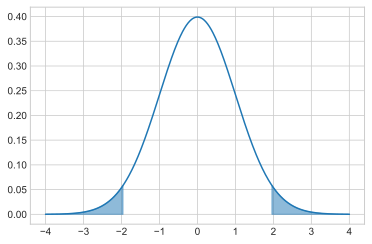

In [12]:
ox = np.linspace(-4, 4, 500)
oy = stats.norm.pdf(ox)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.norm.pdf(ox_left)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.norm.pdf(ox_right)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

__Статистический тест__

Итак, осталось лишь провести статистический тест. У нас есть:
1. зафиксированная нами статистика $S(X)$,
2. построенная нами критическая область $\Omega_\alpha$.

Считаем значение статистики от нашей выборки. Если это значение попадает в критическую область, то заключаем, что данные противоречат нулевой гипотезе, и её следует отвергнуть.

Если значение в критическую область не попало, то заключаем, что данные нулевой гипотезе не противоречат.

_Замечание_. То, что данные не противоречат нулевой гипотезе, не означает, что она верна.

__Пример 1 (продолжение)__

Проводим статистический тест.

In [13]:
S = statistic(samples)
S

2.1252589504967747

Значение попало в критическую область. Нулевая гипотеза отвергается.

__Пример 2__

В реальности у нас редко есть что-то кроме самой выборки. В частности, дисперсию случайной величины мы скорее всего не знаем. Как мы уже отмечали ранее, в таком случае мы тоже можем провести статистический тест, однако, нам нужно будет для этого взять другую статистику, а именно
$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$
где $\sigma_X$ — несмещённая оценка среднего квадратического отклонения. В нашем случае это:
$$t = \dfrac{\overline{X} - 1}{\sigma_X / \sqrt{n}}$$

In [14]:
def statistic(samples: np.ndarray) -> float:
    return (samples.mean() - 1) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

Кроме того, распределение этой статистики тоже будет другое: t-распределение Стьюдента. Значит, квантили тоже придётся считать заново.

In [15]:
n = samples.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-2.068657610419041, 2.0686576104190406)

Итак, теперь критическая область немного шире:
$$\Omega_\alpha = (-\infty, -2.07) \cup (2.07, \infty)$$

(Кстати, отметим, что более широкая критическая область означает, что тест стал более осторожным: в эту область теперь немного _сложнее_ попасть. Это согласуется с интуицией, что когда у нас меньше информации, мы делаем более осторожные выводы.)

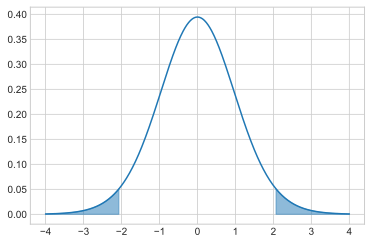

In [16]:
ox = np.linspace(-4, 4, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

Итак, статистический тест:

In [17]:
S = statistic(samples)
S

1.9018640008517087

Значение статистики не попало в критическую область, значит, гипотеза остаётся в силе.

Для проверки гипотез о математическом ожидании с использованием t-статистики существует готовая реализация в `scipy`. Чтобы разобраться с тем, как она работает, поговорим сперва про P-значения.

### P-значения

P-значения позволяют получить результат проверки статистических гипотез сразу для многих уровней значимости. 

Как мы теперь знаем, уменьшение уровня значимости приводит к расширению границ критической области: чем меньше уровень значимости, тем сложнее попасть в критическую область и, как следствие, отвергнуть нулевую гипотезу. __P-значение__ представляет собой наибольшее значение уровня значимости $\alpha$, при котором гипотезу можно принять, т.е. при котором значение статистики, посчитанной по выборке, ещё не попадает в критическую область.

__Пример 3__

В примере 2 мы проверяли гипотезу о математическом ожидании диаметра подшипника. Реализуем этот тест для различных $\alpha$ и посмотрим, как это влияет на результат.

In [18]:
n = samples.shape[0]
S = statistic(samples)

n, S

(24, 1.9018640008517087)

In [19]:
print('alpha\tresult')
print('-------------')

for alpha in np.linspace(0, 0.15, 15):
    t1 = stats.t.ppf(alpha / 2, df=n - 1)
    t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)
    
    print(round(alpha, 4), '\t', t1 <= S <= t2)

alpha	result
-------------
0.0 	 True
0.0107 	 True
0.0214 	 True
0.0321 	 True
0.0429 	 True
0.0536 	 True
0.0643 	 True
0.075 	 False
0.0857 	 False
0.0964 	 False
0.1071 	 False
0.1179 	 False
0.1286 	 False
0.1393 	 False
0.15 	 False


Как мы видим, при малых $\alpha$ имеем довольно широкую критическую область, в которую сложнее попасть. На нескольких первых шагах критическая область достаточно широка, что значение статистики в неё не попадает. Но в какой-то момент критическая область сужается настолько, что поглощает значение статистики. С этого момента гипотеза начинает отвергаться.

P-значением будет то значение $\alpha$, при котором происходит этот переход, т.е. когда одна из границ критической области совпадает со значением статистики.

Пусть $F_S(x)$ — функция распределения рассматриваемой статистики, а $t_{x}$ — квантиль порядка $x$ для этого распределения. Как считать P-значение:

1. Для правосторонней области $\Omega_\alpha = \left( t_{1 - \alpha}, \infty \right)$ имеем условие $t_{1 - \alpha} = S$, откуда $$P_r = 1 - F_S(S)$$

2. Для левосторонней области $\Omega_\alpha = \left( -\infty, t_\alpha \right)$, условие $t_\alpha = S$, откуда $$P_l = F_S(S)$$

3. Для двухсторонней области $\Omega_\alpha = \left( -\infty, t_{\alpha / 2} \right) \cup \left( t_{1 - \alpha / 2} , \infty \right)$ нужна комбинация двух: $$P = 2 \cdot \min (P_l, P_r)$$

В нашем случае область двухсторонняя, так что найдём P-значение по последней формуле.

In [20]:
p_left = stats.t.cdf(S, df=n - 1)
p_right = 1 - stats.t.cdf(S, df=n - 1)

pvalue = 2 * min(p_left, p_right)

pvalue

0.06978674686298825

На практике использовать P-значения можно так: если оно больше выбранного нами уровня значимости $\alpha$, то гипотезу можно принять. В противном случае, гипотезу следует отвергнуть.

Например, для текущей задачи мы использовали уровень значимости $\alpha = 0.05$. Это меньше, чем получившееся P-значение, поэтому гипотеза принимается.

Итак, вернёмся к обсуждению реализации t-теста в `scipy`. Функция `scipy.stats.ttest_1samp` принимает на вход два параметра:
1. выборку,
2. значение математического ожидания в соответствии с нулевой гипотезой.

Возвращает эта функция значение статистики, а также P-значение:

In [21]:
stats.ttest_1samp(samples, popmean=1)

Ttest_1sampResult(statistic=1.901864000851709, pvalue=0.06978674686298816)

Как мы видим, и статистика, и P-значение совпадают с тем, что мы ранее посчитали вручную.

__Статистическая мощность__

Отметим, что у статистических тестов есть ещё одна важная характеристика — __статистическая мощность__. Тогда как уровень значимости связан с ошибками первого рода, статистическая мощность связана с ошибками второго рода.

Как именно они связаны, и что можно делать с помощью статистической мощности — читайте в дополнительных материалах к уроку.

### Доверительные интервалы

Ранее мы познакомились со способами оценивать параметры распределения по выборке. Всё это были __точечные__ оценки, т.е. мы оценивали параметр каким-то единственным числом.  

Минус таких оценок в том, что у нас нет возможности понять, насколько хорошей такая оценка получилась (т.е. насколько близко мы оказались к реальному значению оцениваемого параметра).

Для исправления этого недостатка используют доверительные интервалы. __Доверительный интервал__ — это интервал, который с некоторой вероятностью (заданной заранее) содержит значение оцениваемого параметра.

Более строго: пусть задано число $p$, называемое __уровнем доверия__ или __доверительной вероятностью__. Доверительным интервалом для параметра $\theta$ называется пара статистик $L$ и $U$, таких, что
$$P(L \leq \theta \leq U) = p$$

Доверительные интервалы используют ту же математическую базу, что и статистические тесты.

Например, пусть дана выборка $X$ из __нормально распределённой__ случайной величины с __известной дисперсией__ $\sigma ^ 2$, и требуется построить доверительный интервал для математического ожидания $\mu$ с доверительной вероятностью $p$. Мы знаем, что в этом случае статистика
$$Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}}$$
имеет стандартное нормальное распределение. 

Обозначим $\alpha = 1 - p$. Можно убедиться в том, что
$$P \left( t_{\alpha / 2} \leq Z \leq t_{1 - \alpha / 2} \right) = p,$$
где $t_{x}$ — квантиль порядка $x$ для стандартного нормального распределения. Подставляя сюда $Z$, получаем
$$P \left( t_{\alpha / 2} \leq \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}} \leq t_{1 - \alpha / 2} \right) = p$$
$$P \left( t_{\alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \leq \overline{X} - \mu \leq t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \right) = p$$


<center>
    <div style="width: 350px;border:1px solid black;">
        $P \left( \overline{X} + t_{\alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X} + t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \right) = p$
    </div>
</center>

В случае __неизвестной дисперсии__ мы используем статистику
$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$
где $\sigma_X$ — выборочное среднее квадратическое отклонение. Эта статистика имеет распределение Стьюдента, поэтому
$$P \left( t_{\alpha / 2, \: n - 1} \leq t \leq t_{1 - \alpha / 2, \: n - 1} \right) = p,$$
где $t_{x, \: n - 1}$ — квантиль порядка $x$ для распределения Стьюдента с параметром $df = n - 1$. Аналогичным способом получаем доверительный интервал:
$$P \left( \overline{X} + t_{\alpha / 2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} \leq \mu \leq \overline{X} + t_{1 - \alpha / 2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} \right) = p$$

__Пример 4__

Построим доверительный интервал для мат. ожидания диаметра подшипника, используя выборку из примера 1. Будем считать, что дисперсия незивестна, и использовать t-статистику.

In [22]:
n = samples.shape[0]

mean = samples.mean()
std = samples.std(ddof=1)

n, mean, std

(24, 1.1084541666666665, 0.27936526343958135)

Нужные нам квантили найдём с помощью `scipy`:

In [23]:
p = 0.95
alpha = 1 - p

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-2.0686576104190406, 2.0686576104190406)

Итак, доверительный интервал:

In [24]:
(mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n))

(0.9904885617884089, 1.226419771544924)

Замечание, сделанное ранее про использование t-статистики для распределений, отличных от нормального, справедливо и здесь: если размер выборки $n$ достаточно велик, то доверительные интервалы для математического ожидания можно строить по полученным выше формулам.

Однако, как и ранее, отметим, что при использовании доверительных интервалов в таких случаях надо проявлять осторожность, поскольку строятся они лишь приблизительно.

Отдельно стоит отметить случаи, когда выборка содержит лишь два различных значения ($0$ или $1$), которые часто встречаются в статистике. Как работать с такими случаями, читайте в дополнительном материале к уроку.